In [23]:
# Modified from: http://nbviewer.jupyter.org/urls/cs287.github.io/Lectures/notebooks/vectors.ipynb

%matplotlib inline

In [24]:
import numpy as np
from numpy.linalg import norm

In [26]:
import gzip
words = []
vectors = []

# Word embeddings coming from https://nlp.stanford.edu/projects/glove/
for l in open("glove.6B.50d.txt"):
    t = l.strip().split()
    words.append(t[0])
    vectors.append(list(map(float, t[1:])))

In [27]:
wordvecs = np.array(vectors, dtype=np.double)
word2id = {word:i for i, word in enumerate(words)}

In [28]:
word2id["athens"]

3264

In [49]:
wordvecs[word2id["cheese"]]

array([-0.053903, -0.30871 , -1.3285  , -0.43342 ,  0.31779 ,  1.5224  ,
       -0.6965  , -0.037086, -0.83784 ,  0.074107, -0.30532 , -0.1783  ,
        1.2337  ,  0.085473,  0.17362 , -0.19001 ,  0.36907 ,  0.49454 ,
       -0.024311, -1.0535  ,  0.5237  , -1.1489  ,  0.95093 ,  1.1538  ,
       -0.52286 , -0.14931 , -0.97614 ,  1.3912  ,  0.79875 , -0.72134 ,
        1.5411  , -0.15928 , -0.30472 ,  1.7265  ,  0.13124 , -0.054023,
       -0.74212 ,  1.675   ,  1.9502  , -0.53274 ,  1.1359  ,  0.20027 ,
        0.02245 , -0.39379 ,  1.0609  ,  1.585   ,  0.17889 ,  0.43556 ,
        0.68161 ,  0.066202])

In [34]:
def nearest(vec, dot=False):
    vnorm = norm(vec)
    scores = []
    for i in range(len(words)):
        wvnorm = norm(wordvecs[i])
        if not dot:
            scores.append(np.dot(wordvecs[i], vec) / (vnorm * wvnorm))
        else:
            scores.append(np.dot(wordvecs[i], vec))
    score_ids = [(s, i) for i, s in enumerate(scores)]
    score_ids.sort()
    score_ids.reverse()
    return score_ids
def print_nbest(embedding):
    closests = nearest(embedding)
    for score, i in closests[:20]:
        print("%s\t%s"%(words[i],score))
def print_neighbors(word):
    print_nbest(wordvecs[word2id[word]])

In [51]:
print_neighbors("mit")

mit	1.0
harvard	0.756947340987
princeton	0.750007940354
caltech	0.749890100201
yale	0.729205607001
phd	0.711987073621
sloan	0.707940531402
doctoral	0.698336221499
graduate	0.698005290895
cornell	0.688826629052
ph.d.	0.688007126867
postdoctoral	0.675413038489
uw	0.673567199438
nyu	0.66596287673
physics	0.662308351179
science	0.660250749235
institute	0.659196857903
berkeley	0.655252267135
lab	0.653446051466
thesis	0.65152319993


In [32]:
def analogy_vec(a, b, c):
    return wordvecs[word2id[b]] - wordvecs[word2id[a]] + wordvecs[word2id[c]]

In [56]:
d = analogy_vec("king", "queen", "man")
#print d
#print_nbest(d)
print_nbest(wordvecs[word2id["king"]]-wordvecs[word2id["man"]])

vajiravudh	0.761330384762
jeongjo	0.758159417773
prajadhipok	0.743890995435
andrianampoinimerina	0.723369781608
seonjo	0.722704060066
coloman	0.711871875539
jangsu	0.710504481457
gojong	0.709680872128
taejong	0.704768175043
bimbisara	0.695957450457
seongjong	0.692696636436
leovigild	0.691435717224
yeongjo	0.690186721164
athelstan	0.689475151987
injo	0.684838116224
taksin	0.684478966383
kalākaua	0.683567119676
dutugemunu	0.676528135151
andriamanelo	0.675922552231
kotte	0.674908825303


In [39]:
d = analogy_vec("athens", "greece", "oslo")
print_nbest(d)


oslo	0.800940880805
norway	0.724581222223
cyprus	0.710603502924
accord	0.67236605952
iceland	0.669985509136
pact	0.668983334486
accords	0.66773110168
palestine	0.666339553777
brokered	0.656774460813
agreement	0.654591264655
norwegian	0.65360254298
treaty	0.642123535162
ankara	0.641830299428
copenhagen	0.632054092737
greece	0.631164428988
malta	0.628695581307
cypriots	0.628685760459
accession	0.62584522837
plo	0.624709159735
baltic	0.61372345483


In [40]:
to_show = [w.lower() for w in ["london", "england",
"Athens", "Greece",
"Berlin","Germany",
"Madrid","Spain",
"Rome","Italy",
"Paris","France",
"Bucharest", "Romania",
"Budapest", "Hungary",
"Vienna", "Austria",
"Warsaw", "Poland"]]

to_show_vecs = [wordvecs[word2id[w]] for w in to_show ]


In [41]:
to_show = [w.lower() for w in ["woods", "golf",
"agassi", "tennis",
"bonds","baseball",
"manning", "football",
"gretzky","hockey",
"jordan","basketball"
]]

to_show_vecs = [wordvecs[word2id[w]] for w in to_show ]


In [43]:
import sklearn.decomposition
t = sklearn.decomposition.PCA(2)
X_pca = t.fit_transform(to_show_vecs)

In [44]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox

In [45]:
def plot_embedding(X, words, title=None, size=(3,3)):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=size)
    ax = plt.subplot(111)
    ids = {}
    

    for i in range(X.shape[0]):
        letter = words[i]
        ax.plot(X[i, 0], X[i, 1],".")
        ax.annotate(letter, (X[i, 0], X[i, 1]), fontsize=30) 
        if i % 2 == 0:
            ax.plot((X[i,0], X[i+1,0]), (X[i,1], X[i+1,1]))           

    plt.xticks([]), plt.yticks([])
    plt.axis('off')
    
    if title is not None:
        plt.title(title)
    plt.subplots_adjust(left=-0.2, right=1.2, top=1.2, bottom=-0.2)
    #plt.savefig("linear.png", dpi=100)

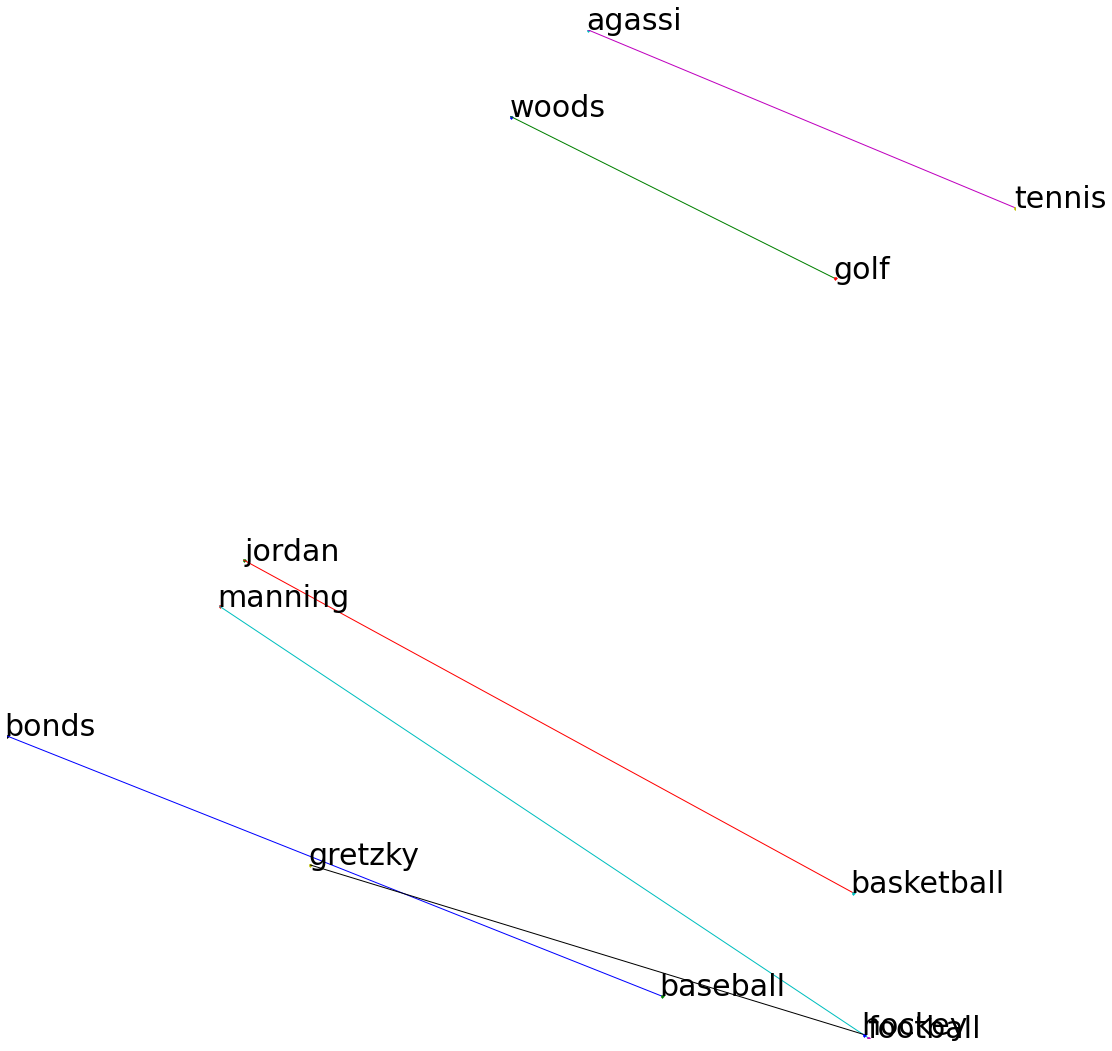

In [46]:
plot_embedding(X_pca, to_show, size=(10,10))